In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [ ]:
sector_tickers = ['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XLK', 'XLC', 'XLU', 'XLRE']

sector_data = yf.download(sector_tickers,
                          start='2020-01-01',
                          end='2023-01-01',
                          progress=False
                          )['Adj Close']

In [ ]:
sector_data.head()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2020-01-02,56.225204,52.538639,50.681396,28.755959,77.958755,90.061401,56.708942,33.790268,56.664707,96.242546,122.825317
2020-01-03,55.317455,52.199749,50.530815,28.450636,77.808464,89.048828,56.618172,34.037811,56.780148,95.403847,121.780075
2020-01-06,55.076611,52.896908,50.924011,28.432131,77.836647,89.260986,56.736160,34.046650,56.833435,95.997528,122.118805
2020-01-07,55.011776,52.964687,50.790154,28.247087,77.676994,89.222397,56.300503,33.675331,56.753510,95.809067,121.925240
2020-01-08,55.206287,53.342312,49.953556,28.432131,77.939964,90.177139,56.509254,33.843311,56.726871,96.431015,122.293022


Finding the returns

In [ ]:
returns_data = sector_data.pct_change()
returns_columns = [col + '_r' for col in sector_data.columns]
returns_data.columns = returns_columns
sector_data_with_returns = pd.concat([sector_data, returns_data], axis=1)
sector_data_with_returns = sector_data_with_returns.dropna()
sector_data_with_returns.head()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,...,XLC_r,XLE_r,XLF_r,XLI_r,XLK_r,XLP_r,XLRE_r,XLU_r,XLV_r,XLY_r
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,55.317455,52.199749,50.530815,28.450636,77.808464,89.048828,56.618172,34.037811,56.780148,95.403847,...,-0.006450,-0.002971,-0.010618,-0.001928,-0.011243,-0.001601,0.007326,0.002037,-0.008714,-0.008510
2020-01-06,55.076611,52.896908,50.924011,28.432131,77.836647,89.260986,56.736160,34.046650,56.833435,95.997528,...,0.013356,0.007781,-0.000650,0.000362,0.002382,0.002084,0.000260,0.000938,0.006223,0.002781
2020-01-07,55.011776,52.964687,50.790154,28.247087,77.676994,89.222397,56.300503,33.675331,56.753510,95.809067,...,0.001281,-0.002629,-0.006508,-0.002051,-0.000432,-0.007679,-0.010906,-0.001406,-0.001963,-0.001585
2020-01-08,55.206287,53.342312,49.953556,28.432131,77.939964,90.177139,56.509254,33.843311,56.726871,96.431015,...,0.007130,-0.016472,0.006551,0.003385,0.010701,0.003708,0.004988,-0.000469,0.006492,0.003016
2020-01-09,55.410072,53.623119,50.321655,28.607925,78.268661,91.199348,56.908615,33.834465,57.037682,96.845650,...,0.005264,0.007369,0.006183,0.004217,0.011336,0.007067,-0.000261,0.005479,0.004300,0.005302


Let's calculate the rolling standard deviation using a 60-day window

In [ ]:
sector_data_with_returns.columns
return_columns = sector_data_with_returns.columns[11:]

window_size = 60

for col in return_columns:
    std_col_name = col.replace('_r', '_std')
    sector_data_with_returns[std_col_name] = sector_data_with_returns[col].rolling(window=window_size).std()

sector_data_with_returns = sector_data_with_returns.dropna()
sector_data_with_returns.head()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,...,XLC_std,XLE_std,XLF_std,XLI_std,XLK_std,XLP_std,XLRE_std,XLU_std,XLV_std,XLY_std
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-30,42.585857,43.034897,24.479353,19.977015,56.549809,79.393356,50.753437,28.520975,51.787746,84.248100,...,0.033098,0.053503,0.044475,0.039590,0.041104,0.030916,0.039836,0.040170,0.031940,0.034127
2020-03-31,41.998405,42.957218,24.855694,19.426504,55.849442,77.910172,49.721931,27.612434,49.697937,83.878769,...,0.033094,0.053600,0.044564,0.039601,0.041146,0.031013,0.040001,0.040492,0.031929,0.034191
2020-04-01,40.105492,41.248245,23.624027,18.241505,53.331921,74.197395,48.882118,25.937874,46.711212,80.687637,...,0.033367,0.053783,0.045134,0.039935,0.041573,0.031070,0.040692,0.041193,0.032254,0.034590
2020-04-02,40.711597,41.772591,25.787996,18.698709,54.041744,75.932610,50.132702,26.320883,48.173180,82.922386,...,0.033428,0.055390,0.045316,0.040007,0.041704,0.031264,0.040750,0.041422,0.032487,0.034604
2020-04-03,39.732502,40.927811,25.514294,18.325481,53.322453,74.759644,50.525219,26.098207,46.451111,82.174316,...,0.033469,0.055383,0.045322,0.040004,0.041708,0.031280,0.040740,0.041652,0.032481,0.034632


Compare market risk for 2 periods (last day of March 2020 and 2022) for XL*

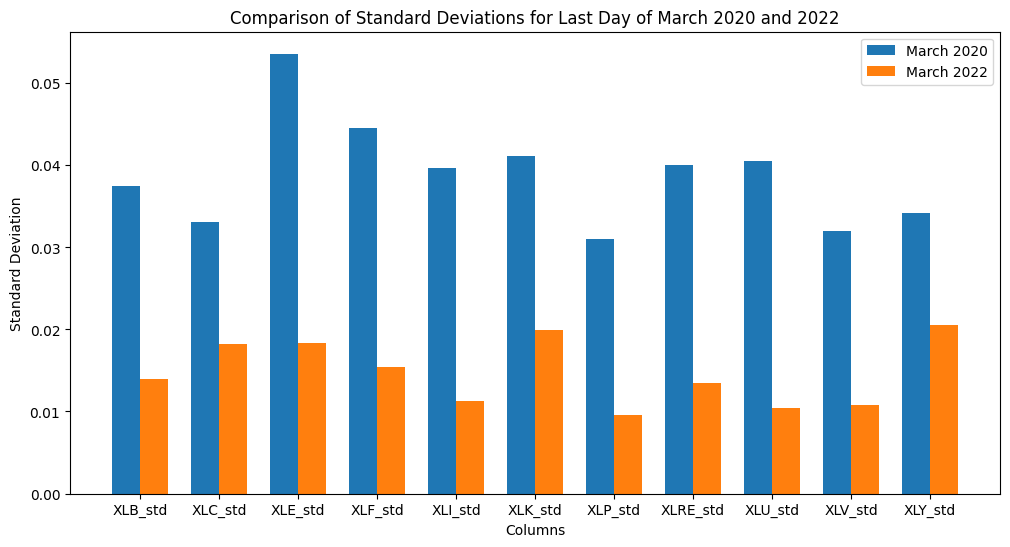

In [ ]:
std_columns = sector_data_with_returns.columns[22:]
march_2020_data = sector_data_with_returns.loc['2020-03-31', std_columns]
march_2022_data = sector_data_with_returns.loc['2022-03-31', std_columns]

fig, ax = plt.subplots(figsize=(12, 6))

# Set bar width and position
bar_width = 0.35
bar_positions_2020 = range(len(std_columns))
bar_positions_2022 = [pos + bar_width for pos in bar_positions_2020]

ax.bar(bar_positions_2020, march_2020_data, width=bar_width, label='March 2020') # Plot bars for March 2020

ax.bar(bar_positions_2022, march_2022_data, width=bar_width, label='March 2022') # Plot bars for March 2022

# x-axis labels and ticks
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions_2020])
ax.set_xticklabels(std_columns)

ax.set_xlabel('Columns')
ax.set_ylabel('Standard Deviation')
ax.set_title('Comparison of Standard Deviations for Last Day of March 2020 and 2022')

ax.legend()

plt.show()

We can see march of 2022 was less volatile than march of 2020

Diversification – build an equally-weighted portfolio of 11 sectors, calculate portfolio risk, compare it against risk of each portfolio’s component

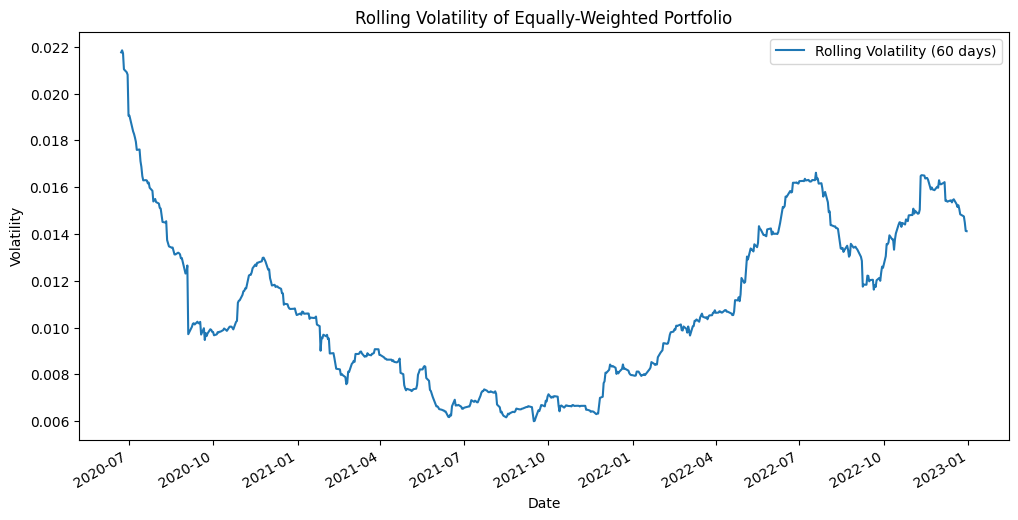

In [ ]:
xl_columns = ['XLB_r', 'XLC_r', 'XLE_r', 'XLF_r', 'XLI_r', 'XLK_r', 'XLP_r', 'XLRE_r', 'XLU_r', 'XLV_r', 'XLY_r']

weights = [1 / len(xl_columns) for _ in xl_columns]

sector_returns = sector_data_with_returns[xl_columns]
portfolio_returns = (sector_returns * weights).sum(axis=1)

rolling_volatility = portfolio_returns.rolling(window=60).std()
plt.figure(figsize=(12, 6))
rolling_volatility.plot(label='Rolling Volatility (60 days)')
plt.title('Rolling Volatility of Equally-Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

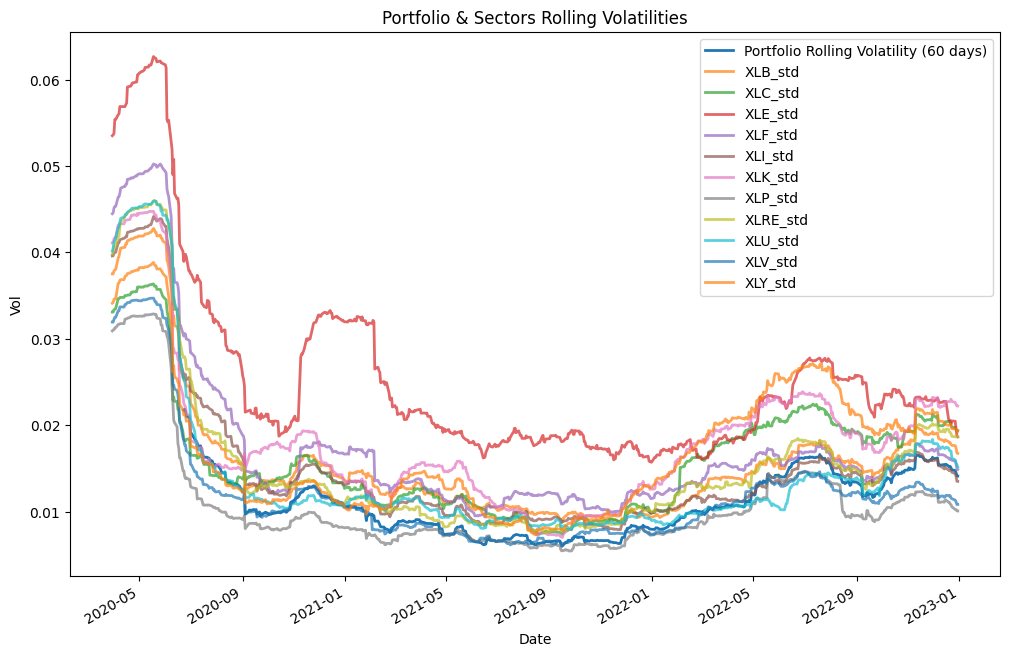

In [ ]:
plt.figure(figsize=(12, 8))

rolling_volatility.plot(label='Portfolio Rolling Volatility (60 days)', linewidth=2)

for col in std_columns:
    plt.plot(sector_data_with_returns.index, sector_data_with_returns[col], label=col, alpha=0.7, linewidth=2)


plt.title('Portfolio & Sectors Rolling Volatilities')
plt.xlabel('Date')
plt.ylabel('Vol')

plt.legend()

plt.show()

In [ ]:
ind = sector_data_with_returns[['XLB_r', 'XLC_r', 'XLE_r', 'XLF_r', 'XLI_r', 'XLK_r', 'XLP_r', 'XLRE_r', 'XLU_r', 'XLV_r', 'XLY_r']]

def annualize_rets(r, periods_per_year):
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [ ]:
sharpe_ratio(ind, 0.03, 365).sort_values()

XLC_r     0.147193
XLRE_r    0.395957
XLY_r     0.419725
XLU_r     0.589118
XLK_r     0.761247
XLF_r     0.939513
XLP_r     1.081328
XLI_r     1.123222
XLB_r     1.197628
XLV_r     1.282438
XLE_r     1.916040
dtype: float64

Top 5: Energy, Health Care, Materials, Information Technology, Consumer Staples

<Axes: title={'center': 'Industry Sharpe Ratios'}>

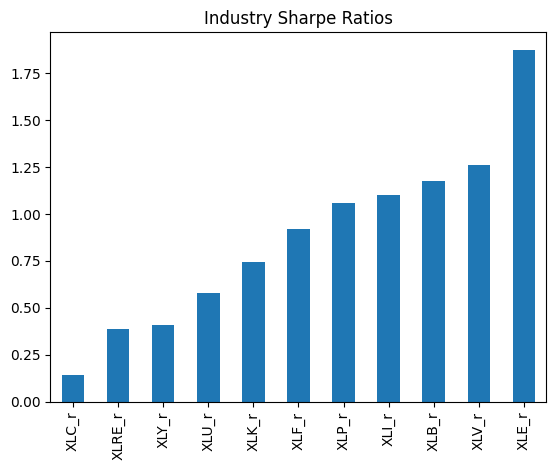

In [ ]:
sharpe_ratio(ind, 0.03, 356).sort_values().plot.bar(title="Industry Sharpe Ratios")